In [61]:
import sys
sys.path.append('/home/iaw/MYscrip/WatAna')
import os

In [62]:
from util.traj_xyz import *
from util.auto_corr_fft import *
from util.auto_corr_to_Iw import *
from util.read_qv import *

In [63]:
def save_Ct(fp: str, tau: NDArray, Ct: NDArray) -> None:
    with open(fp, "w+") as F:
        for i, i_x in enumerate(tau):
            F.writelines("{:.6f}, {:.6f}\n".format(i_x, Ct[i]))
            
def save_Ir(fp: str, title: str, freq, Iw: NDArray) -> None:
    with open(fp, "w+") as F:
        F.writelines(title)
        if Iw.ndim == 2:
            for i in range(freq.shape[0]):
                txt = ["{:.6f}".format(freq[i])] + ["{:.6f}".format(Iw[i, j]) for j in range(Iw.shape[1])]
                txt = ",".join(txt) + "\n"
                F.writelines(txt)
        else:
            for i in range(freq.shape[0]):
                F.writelines("{:.6f}, {:.6f}\n".format(freq[i], Iw[i]))


In [64]:
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

In [65]:
plt.rcParams["axes.labelweight"] ="bold" 
plt.rcParams["font.family"]="Times New Roman" 
plt.rcParams["font.weight"]="bold" 
plt.rcParams["font.size"]=14 
plt.rcParams["mathtext.default"]="regular"


def init_fig(ax):
    ax.spines['left'].set_position(('axes',0))
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)
    ax.tick_params(which='major'          # 设置对主刻度和次刻度生效
                        ,bottom=True           # 底部坐标轴
                        ,left=True             # 左侧坐标轴
                        , right = True
                        , top = True
                        ,direction='in'       # 设置刻度线方向，'in' 表示朝内
                        ,width=2               # 设置刻度线粗细
                        ,length=8              # 设置长短
                        ,labelsize=20
    
                        )
    ax.tick_params(which='minor'          # 设置对主刻度和次刻度生效
                        ,bottom=True           # 底部坐标轴
                        ,left=True             # 左侧坐标轴
                        , right = True
                        , top = True
                        ,direction='in'       # 设置刻度线方向，'in' 表示朝内
                        ,width=2               # 设置刻度线粗细
                        ,length=5              # 设置长短
                        ,labelsize=20

                        )
    ax.xaxis.set_major_locator(ticker.MultipleLocator(500))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(250))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))

    return ax


# 加载数据

## 实验数据

In [66]:
exp_data = np.loadtxt("./data/exp_h2o.csv", delimiter=",")

## PBE的数据

### 45ps

In [67]:
pbe_45ps = pbe_config(
      dt = 0.0005   # ps
    , xyz_f= "/home/iaw/DATA/csw_wat_pbe/water-pos-1.xyz"
    , n_read = 90000 
    , qv_save = "./out/pbe_45ps_qv.npy"
)
pbe_45ps_Ct_save = "./out/pbe_45ps_Ct.csv"
if not os.path.exists(pbe_45ps.qv_save):
    qv_45ps_pbe = qv_pbe(pbe_45ps)
else:
    qv_45ps_pbe = np.load(pbe_45ps.qv_save)
# autocorr
Ct_45ps_pbe = auto_corr_fft(qv_45ps_pbe, fraction_autocorrelation_function_to_fft = 0.1)
tau_45ps_pbe = np.array(list(range(Ct_45ps_pbe.shape[0])), dtype=np.float64) * pbe_45ps.dt
# save
save_Ct(pbe_45ps_Ct_save, tau_45ps_pbe, Ct_45ps_pbe)
# autocorr + hann
Ct_45ps_pbe_hann = auto_corr_hann(Ct_45ps_pbe)
# autocorr -> Ir
Iw_pbe_45ps_hann = fft_to_Iw(tau_45ps_pbe, Ct_45ps_pbe_hann)
Iw_pbe_45ps_wohann = fft_to_Iw(tau_45ps_pbe, Ct_45ps_pbe)

### 20ps

In [68]:
pbe_20ps = pbe_config(
      dt = 0.0005   # ps
    , xyz_f= "/home/iaw/DATA/csw_wat_pbe/water-pos-1.xyz"
    , n_read = 40000 
    , qv_save = "./out/pbe_20ps_qv.npy"
)
pbe_20ps_Ct_save = "./out/pbe_20ps_Ct.csv"
if not os.path.exists(pbe_20ps.qv_save):
    qv_20ps_pbe = qv_pbe(pbe_20ps)
else:
    qv_20ps_pbe = np.load(pbe_20ps.qv_save)
# autocorr
Ct_20ps_pbe = auto_corr_fft(qv_20ps_pbe, fraction_autocorrelation_function_to_fft = 0.1)
tau_20ps_pbe = np.array(list(range(Ct_20ps_pbe.shape[0])), dtype=np.float64) * pbe_20ps.dt
# save
save_Ct(pbe_20ps_Ct_save, tau_20ps_pbe, Ct_20ps_pbe)
# autocorr + hann
Ct_20ps_pbe_hann = auto_corr_hann(Ct_20ps_pbe)
# autocorr -> Ir
Iw_pbe_20ps_hann = fft_to_Iw(tau_20ps_pbe, Ct_20ps_pbe_hann)
Iw_pbe_20ps_wohann = fft_to_Iw(tau_20ps_pbe, Ct_20ps_pbe)

## SPCE_qspcfw

### 200 ps

In [69]:
spce_qspcfw_200ps = spce_config(
      fp_ncdf = "/mnt/var2/5_WAT_MD/wat_md/bulk_spce_flex_qspcfw/nvt-0.5fs/md20ps.ncdf"
    , fp_top = "/mnt/var2/5_WAT_MD/wat_md/bulk_spce_flex_qspcfw/nvt-0.5fs/model.prmtop"
    , start_frame = 0
    , end_frame = 400000
    , step = 1
    , sele_mask = "type OW"
    , atom_charge = [-0.8400, 0.4200]
    , n_worker = 10
    , dt = 0.0005   # ps
    , qv_save = './out/spce_qspcfw_200ps_qv.npy'
)
spce_qspcfw_200ps_Ct_save = "./out/spce_qspcfw_200ps_Ct.csv"
if not os.path.exists(spce_qspcfw_200ps.qv_save):
    qv_200ps_spce_qspcfw = qv_spce(spce_qspcfw_200ps)
else:
    qv_200ps_spce_qspcfw = np.load(spce_qspcfw_200ps.qv_save)
# autocorr
Ct_200ps_spce_qspcfw = auto_corr_fft(qv_200ps_spce_qspcfw, fraction_autocorrelation_function_to_fft = 0.1)
tau_200ps_spce_qspcfw = np.array(list(range(Ct_200ps_spce_qspcfw.shape[0])), dtype=np.float64) * spce_qspcfw_200ps.dt
# save
save_Ct(spce_qspcfw_200ps_Ct_save, tau_200ps_spce_qspcfw, Ct_200ps_spce_qspcfw)
# autocorr + hann
Ct_200ps_spce_qspcfw_hann = auto_corr_hann(Ct_200ps_spce_qspcfw)
# autocorr -> Ir
Iw_spce_qspcfw_200ps_hann = fft_to_Iw(tau_200ps_spce_qspcfw, Ct_200ps_spce_qspcfw_hann)
Iw_spce_qspcfw_200ps_wohann = fft_to_Iw(tau_200ps_spce_qspcfw, Ct_200ps_spce_qspcfw)

### 100 ps

In [70]:
spce_qspcfw_100ps = spce_config(
      fp_ncdf = "/mnt/var2/5_WAT_MD/wat_md/bulk_spce_flex_qspcfw/nvt-0.5fs/md20ps.ncdf"
    , fp_top = "/mnt/var2/5_WAT_MD/wat_md/bulk_spce_flex_qspcfw/nvt-0.5fs/model.prmtop"
    , start_frame = 0
    , end_frame = 200000
    , step = 1
    , sele_mask = "type OW"
    , atom_charge = [-0.8400, 0.4200]
    , n_worker = 10
    , dt = 0.0005   # ps
    , qv_save = './out/spce_qspcfw_100ps_qv.npy'
)
spce_qspcfw_100ps_Ct_save = "./out/spce_qspcfw_100ps_Ct.csv"
if not os.path.exists(spce_qspcfw_100ps.qv_save):
    qv_100ps_spce_qspcfw = qv_spce(spce_qspcfw_100ps)
else:
    qv_100ps_spce_qspcfw = np.load(spce_qspcfw_100ps.qv_save)
# autocorr
Ct_100ps_spce_qspcfw = auto_corr_fft(qv_100ps_spce_qspcfw, fraction_autocorrelation_function_to_fft = 0.1)
tau_100ps_spce_qspcfw = np.array(list(range(Ct_100ps_spce_qspcfw.shape[0])), dtype=np.float64) * spce_qspcfw_100ps.dt
# save
save_Ct(spce_qspcfw_100ps_Ct_save, tau_100ps_spce_qspcfw, Ct_100ps_spce_qspcfw)
# autocorr + hann
Ct_100ps_spce_qspcfw_hann = auto_corr_hann(Ct_100ps_spce_qspcfw)
# autocorr -> Ir
Iw_spce_qspcfw_100ps_hann = fft_to_Iw(tau_100ps_spce_qspcfw, Ct_100ps_spce_qspcfw_hann)
Iw_spce_qspcfw_100ps_wohann = fft_to_Iw(tau_100ps_spce_qspcfw, Ct_100ps_spce_qspcfw)

### 50 ps

In [71]:
spce_qspcfw_50ps = spce_config(
      fp_ncdf = "/mnt/var2/5_WAT_MD/wat_md/bulk_spce_flex_qspcfw/nvt-0.5fs/md20ps.ncdf"
    , fp_top = "/mnt/var2/5_WAT_MD/wat_md/bulk_spce_flex_qspcfw/nvt-0.5fs/model.prmtop"
    , start_frame = 0
    , end_frame = 100000
    , step = 1
    , sele_mask = "type OW"
    , atom_charge = [-0.8400, 0.4200]
    , n_worker = 10
    , dt = 0.0005   # ps
    , qv_save = './out/spce_qspcfw_50ps_qv.npy'
)
spce_qspcfw_50ps_Ct_save = "./out/spce_qspcfw_50ps_Ct.csv"
if not os.path.exists(spce_qspcfw_50ps.qv_save):
    qv_50ps_spce_qspcfw = qv_spce(spce_qspcfw_50ps)
else:
    qv_50ps_spce_qspcfw = np.load(spce_qspcfw_50ps.qv_save)
# autocorr
Ct_50ps_spce_qspcfw = auto_corr_fft(qv_50ps_spce_qspcfw, fraction_autocorrelation_function_to_fft = 0.1)
tau_50ps_spce_qspcfw = np.array(list(range(Ct_50ps_spce_qspcfw.shape[0])), dtype=np.float64) * spce_qspcfw_50ps.dt
# save
save_Ct(spce_qspcfw_50ps_Ct_save, tau_50ps_spce_qspcfw, Ct_50ps_spce_qspcfw)
# autocorr + hann
Ct_50ps_spce_qspcfw_hann = auto_corr_hann(Ct_50ps_spce_qspcfw)
# autocorr -> Ir
Iw_spce_qspcfw_50ps_hann = fft_to_Iw(tau_50ps_spce_qspcfw, Ct_50ps_spce_qspcfw_hann)
Iw_spce_qspcfw_50ps_wohann = fft_to_Iw(tau_50ps_spce_qspcfw, Ct_50ps_spce_qspcfw)

## SPCE_spcfw

### 200 ps

In [72]:
spce_spcfw_200ps = spce_config(
      fp_ncdf = "/mnt/var2/5_WAT_MD/wat_md/bulk_spce_flex_spcfw/nvt_200ps/md200ps.ncdf"
    , fp_top = "/mnt/var2/5_WAT_MD/wat_md/bulk_spce_flex_spcfw/nvt_200ps/model.prmtop"
    , start_frame = 0
    , end_frame = 400000
    , step = 1
    , sele_mask = "type OW"
    , atom_charge = [-0.8400, 0.4200]
    , n_worker = 10
    , dt = 0.0005   # ps
    , qv_save = './out/spce_spcfw_200ps_qv.npy'
)
spce_spcfw_200ps_Ct_save = "./out/spce_spcfw_200ps_Ct.csv"
if not os.path.exists(spce_spcfw_200ps.qv_save):
    qv_200ps_spce_spcfw = qv_spce(spce_spcfw_200ps)
else:
    qv_200ps_spce_spcfw = np.load(spce_spcfw_200ps.qv_save)
# autocorr
Ct_200ps_spce_spcfw = auto_corr_fft(qv_200ps_spce_spcfw, fraction_autocorrelation_function_to_fft = 0.1)
tau_200ps_spce_spcfw = np.array(list(range(Ct_200ps_spce_spcfw.shape[0])), dtype=np.float64) * spce_spcfw_200ps.dt
# save
save_Ct(spce_spcfw_200ps_Ct_save, tau_200ps_spce_spcfw, Ct_200ps_spce_qspcfw)
# autocorr + hann
Ct_200ps_spce_spcfw_hann = auto_corr_hann(Ct_200ps_spce_spcfw)
# autocorr -> Ir
Iw_spce_spcfw_200ps_hann = fft_to_Iw(tau_200ps_spce_spcfw, Ct_200ps_spce_spcfw_hann)
Iw_spce_spcfw_200ps_wohann = fft_to_Iw(tau_200ps_spce_spcfw, Ct_200ps_spce_spcfw)

## SPCE_rigid

### 200 ps

In [73]:
spce_200ps = spce_config(
      fp_ncdf = "/mnt/var2/5_WAT_MD/wat_md/bulk_spce_rigid/nvt_200ps/md200ps.ncdf"
    , fp_top = "/mnt/var2/5_WAT_MD/wat_md/bulk_spce_rigid/nvt_200ps/model.prmtop"
    , start_frame = 0
    , end_frame = 400000
    , step = 1
    , sele_mask = "type OW"
    , atom_charge = [-0.8400, 0.4200]
    , n_worker = 10
    , dt = 0.0005   # ps
    , qv_save = './out/spce_200ps_qv.npy'
)
spce_200ps_Ct_save = "./out/spce_200ps_Ct.csv"
if not os.path.exists(spce_200ps.qv_save):
    qv_200ps_spce = qv_spce(spce_200ps)
else:
    qv_200ps_spce = np.load(spce_200ps.qv_save)
# autocorr
Ct_200ps_spce = auto_corr_fft(qv_200ps_spce, fraction_autocorrelation_function_to_fft = 0.1)
tau_200ps_spce = np.array(list(range(Ct_200ps_spce.shape[0])), dtype=np.float64) * spce_200ps.dt
# save
save_Ct(spce_200ps_Ct_save, tau_200ps_spce, Ct_200ps_spce_qspcfw)
# autocorr + hann
Ct_200ps_spce_hann = auto_corr_hann(Ct_200ps_spce)
# autocorr -> Ir
Iw_spce_200ps_hann = fft_to_Iw(tau_200ps_spce, Ct_200ps_spce_hann)
Iw_spce_200ps_wohann = fft_to_Iw(tau_200ps_spce, Ct_200ps_spce)

## OPC3POL_drude

### 200 ps

In [74]:
opc3pol_durde_200ps = opc3pol_config(
      fp_ncdf = "/mnt/var2/5_WAT_MD/wat_md/bulk_opc3pol_rigid/nvt_200ps/md200ps.ncdf"
    , fp_top = "/mnt/var2/5_WAT_MD/wat_md/bulk_opc3pol_rigid/nvt_200ps/model.prmtop"
    , start_frame = 0
    , end_frame = 400000
    , step = 1
    , sele_mask = "type OW"
    , atom_charge = [-1.9321, 0.3052, 1.3216]   
    , n_worker = 10
    , dt = 0.0005   # ps
    , qv_save = './out/opc3pol_durde_200ps_qv.npy'
    , drude = True
)
opc3pol_durde_200ps_Ct_save = "./out/opc3pol_durde_200ps_Ct.csv"
if not os.path.exists(opc3pol_durde_200ps.qv_save):
    qv_200ps_opc3pol_durde = qv_opc3pol(opc3pol_durde_200ps)
else:
    qv_200ps_opc3pol_durde = np.load(opc3pol_durde_200ps.qv_save)
# autocorr
Ct_200ps_opc3pol_durde = auto_corr_fft(qv_200ps_opc3pol_durde, fraction_autocorrelation_function_to_fft = 0.1)
tau_200ps_opc3pol_durde = np.array(list(range(Ct_200ps_opc3pol_durde.shape[0])), dtype=np.float64) * opc3pol_durde_200ps.dt
# save
save_Ct(opc3pol_durde_200ps_Ct_save, tau_200ps_opc3pol_durde, Ct_200ps_opc3pol_durde)
# autocorr + hann
Ct_200ps_opc3pol_durde_hann = auto_corr_hann(Ct_200ps_opc3pol_durde)
# autocorr -> Ir
Iw_opc3pol_durde_200ps_hann = fft_to_Iw(tau_200ps_opc3pol_durde, Ct_200ps_opc3pol_durde_hann)
Iw_opc3pol_durde_200ps_wohann = fft_to_Iw(tau_200ps_opc3pol_durde, Ct_200ps_opc3pol_durde)

## OPC3POL

### 200 ps

In [75]:
opc3pol_200ps = opc3pol_config(
      fp_ncdf = "/mnt/var2/5_WAT_MD/wat_md/bulk_opc3pol_rigid/nvt_200ps/md200ps.ncdf"
    , fp_top = "/mnt/var2/5_WAT_MD/wat_md/bulk_opc3pol_rigid/nvt_200ps/model.prmtop"
    , start_frame = 0
    , end_frame = 400000
    , step = 1
    , sele_mask = "type OW"
    , atom_charge = [-1.9321, 0.3052, 1.3216]   
    , n_worker = 10
    , dt = 0.0005   # ps
    , qv_save = './out/opc3pol_200ps_qv.npy'
    , drude = False
)
opc3pol_200ps_Ct_save = "./out/opc3pol_200ps_Ct.csv"
if not os.path.exists(opc3pol_200ps.qv_save):
    qv_200ps_opc3pol = qv_opc3pol(opc3pol_200ps)
else:
    qv_200ps_opc3pol = np.load(opc3pol_200ps.qv_save)
# autocorr
Ct_200ps_opc3pol = auto_corr_fft(qv_200ps_opc3pol, fraction_autocorrelation_function_to_fft = 0.1)
tau_200ps_opc3pol = np.array(list(range(Ct_200ps_opc3pol.shape[0])), dtype=np.float64) * opc3pol_200ps.dt
# save
save_Ct(opc3pol_200ps_Ct_save, tau_200ps_opc3pol, Ct_200ps_opc3pol)
# autocorr + hann
Ct_200ps_opc3pol_hann = auto_corr_hann(Ct_200ps_opc3pol)
# autocorr -> Ir
Iw_opc3pol_200ps_hann = fft_to_Iw(tau_200ps_opc3pol, Ct_200ps_opc3pol_hann)
Iw_opc3pol_200ps_wohann = fft_to_Iw(tau_200ps_opc3pol, Ct_200ps_opc3pol)

## TIP3P

### 200 ps

In [76]:
tip3p_200ps = spce_config(
      fp_ncdf = "/home/iaw/DATA/wat_md/bulk_tip3p_rigid/nvt_200ps/md200ps.ncdf"
    , fp_top = "/home/iaw/DATA/wat_md/bulk_tip3p_rigid/nvt_200ps/model.prmtop"
    , start_frame = 0
    , end_frame = 400000
    , step = 1
    , sele_mask = "type OW"
    , atom_charge = [-0.8340, 0.4170]
    , n_worker = 10
    , dt = 0.0005   # ps
    , qv_save = './out/tip3p_200ps_qv.npy'
)
tip3p_200ps_Ct_save = "./out/tip3p_200ps_Ct.csv"
if not os.path.exists(tip3p_200ps.qv_save):
    qv_200ps_tip3p = qv_tip3p(tip3p_200ps)
else:
    qv_200ps_tip3p = np.load(tip3p_200ps.qv_save)
# autocorr
Ct_200ps_tip3p = auto_corr_fft(qv_200ps_tip3p, fraction_autocorrelation_function_to_fft = 0.1)
tau_200ps_tip3p = np.array(list(range(Ct_200ps_tip3p.shape[0])), dtype=np.float64) * tip3p_200ps.dt
# save
save_Ct(tip3p_200ps_Ct_save, tau_200ps_tip3p, Ct_200ps_tip3p)
# autocorr + hann
Ct_200ps_tip3p_hann = auto_corr_hann(Ct_200ps_tip3p)
# autocorr -> Ir
Iw_tip3p_200ps_hann = fft_to_Iw(tau_200ps_tip3p, Ct_200ps_tip3p_hann)
Iw_tip3p_200ps_wohann = fft_to_Iw(tau_200ps_tip3p, Ct_200ps_tip3p)

# 高斯展宽

In [77]:
from scipy.signal import savgol_filter

In [78]:
# 高斯展宽
def gaussian_broadening(freq, spectrum, hwhm, max_freq=5000):
    # 初始化展宽后的光谱
    broadened_spectrum = np.zeros(max_freq + 1)
    gaussian =  lambda freq, center, hwhm: np.exp(-np.log(2.0) / hwhm**2 * (freq - center)**2)
    for i in range(len(freq)):
        center = int(freq[i])
        # 遍历高斯展宽范围
        for j in range(-3 * hwhm, 3 * hwhm + 1):
            current_freq = center + j
            if 0 <= current_freq <= max_freq:
                # 计算高斯函数值并累加到展宽光谱
                broadened_spectrum[current_freq] += spectrum[i] * gaussian(current_freq, center, hwhm)
    
    return broadened_spectrum

In [79]:
freq_g = np.arange(5001)
Iw_tip3p_200ps_hann_g = gaussian_broadening(Iw_tip3p_200ps_hann[0], Iw_tip3p_200ps_hann[1], 30)
Iw_spce_qspcfw_200ps_hann_g = gaussian_broadening(Iw_spce_qspcfw_200ps_hann[0], Iw_spce_qspcfw_200ps_hann[1], 30)
Iw_spce_spcfw_200ps_hann_g = gaussian_broadening(Iw_spce_spcfw_200ps_hann[0], Iw_spce_spcfw_200ps_hann[1], 30)
Iw_spce_200ps_hann_g = gaussian_broadening(Iw_spce_200ps_hann[0], Iw_spce_200ps_hann[1], 30)
Iw_opc3pol_durde_200ps_hann_g = gaussian_broadening(Iw_opc3pol_durde_200ps_hann[0], Iw_opc3pol_durde_200ps_hann[1], 30)
Iw_pbe_45ps_hann_g = gaussian_broadening(Iw_pbe_45ps_hann[0], Iw_pbe_45ps_hann[1], 30)

In [80]:
save_Ir(fp = "./Iw_all_water_gaussian.csv"
        , title = "'freq[cm-1]','tip3p[200ps/hann/30]', 'spce/qspcfw[200ps/hann/30]', 'spce/spcfw[200ps/hann/30]', 'spce[200ps/hann/30]', 'opc3pol[200ps/hann/30]', 'pbe[45ps/hann/30]'\n"
        , freq = freq_g
        , Iw = np.stack([ Iw_tip3p_200ps_hann_g
                          , Iw_spce_qspcfw_200ps_hann_g
                          , Iw_spce_spcfw_200ps_hann_g
                          , Iw_spce_200ps_hann_g
                          , Iw_opc3pol_durde_200ps_hann_g
                          , Iw_pbe_45ps_hann_g], axis=1)
        )

In [81]:
norm_func = lambda x: (x - x.min()) / (x.max() - x.min())

In [87]:
zjb_ir = np.loadtxt("/home/iaw/DATA/wat_md/bulk_pbe/ir_spectrum_H2O.csv")

In [88]:
zjb_ir

array([[0.00000000e+00, 5.33312690e+01, 1.08577862e+02],
       [2.04000000e+00, 5.51541950e+01, 2.20867042e+02],
       [4.07000000e+00, 6.03938670e+01, 3.43823742e+02],
       ...,
       [4.99206000e+03, 2.45628630e+00, 2.76955206e+06],
       [4.99410000e+03, 2.45546930e+00, 2.76955706e+06],
       [4.99613000e+03, 2.44444090e+00, 2.76956203e+06]])

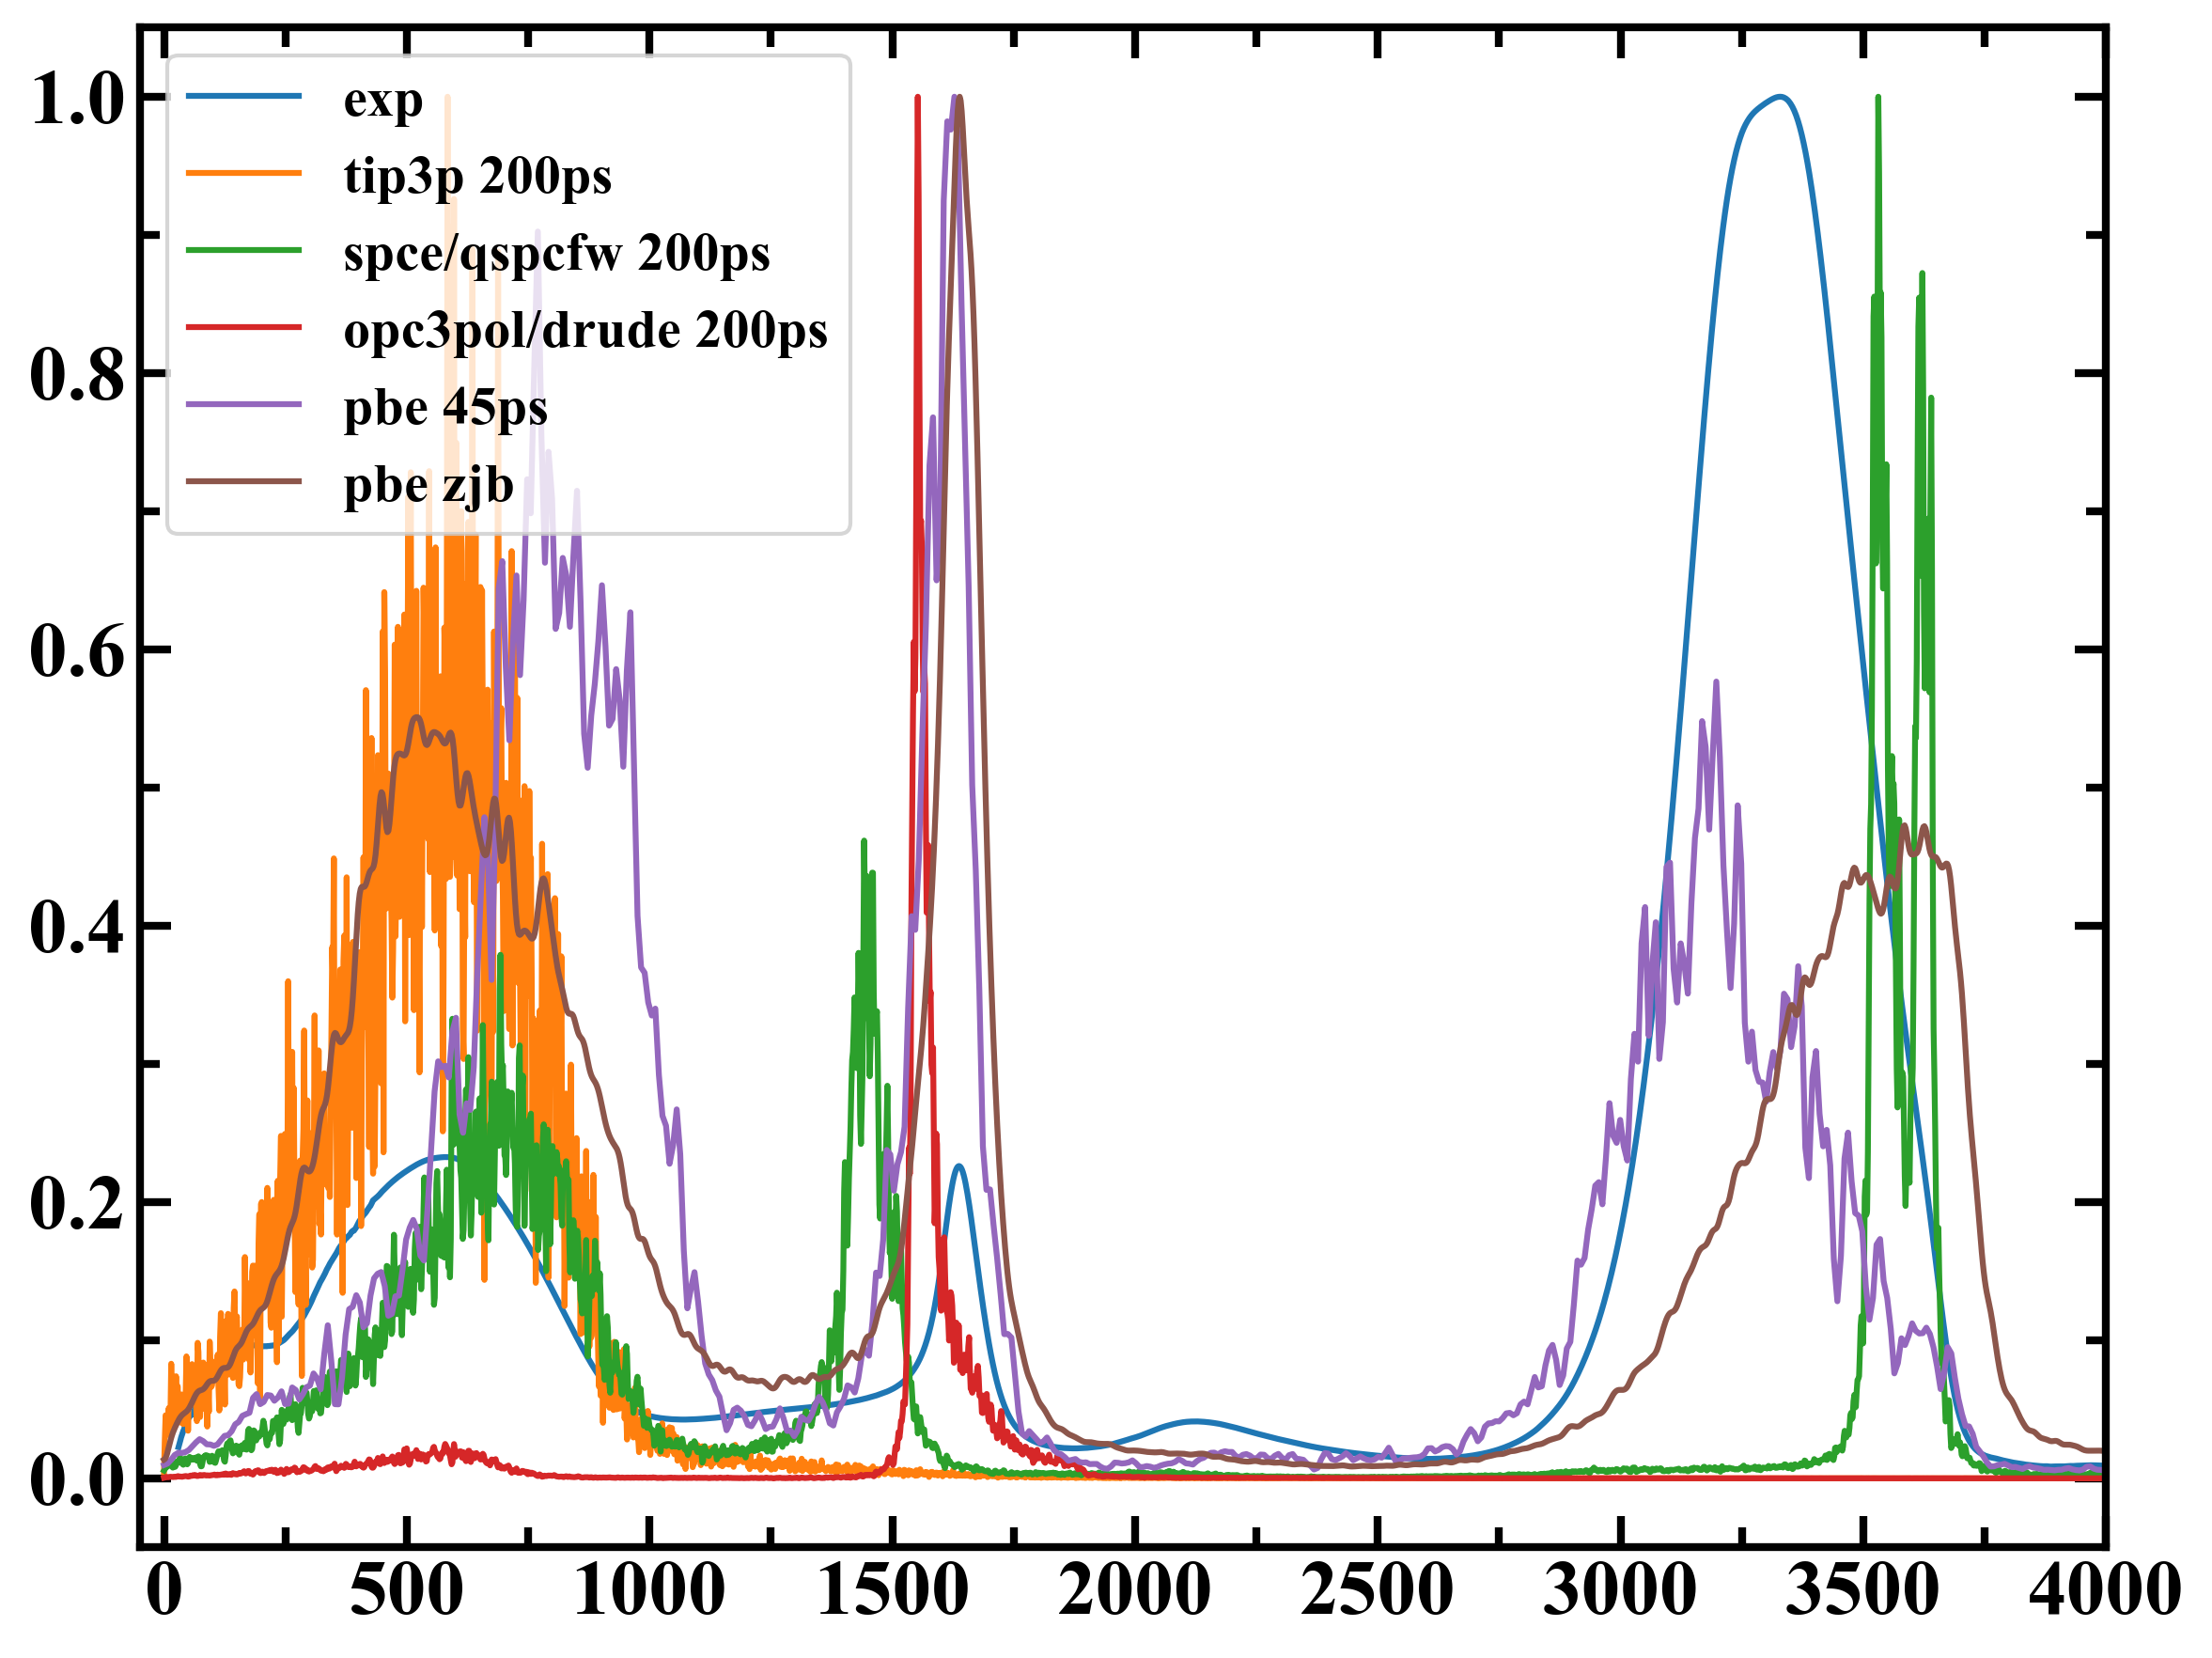

In [89]:
fig = plt.figure(figsize=(9,7),dpi=300)
ax1= plt.gca()
ax1 = init_fig(ax1)
plt.plot(exp_data[:, 0], norm_func(exp_data[:, 1]), label = "exp")
plt.plot(Iw_tip3p_200ps_hann[0], norm_func(Iw_tip3p_200ps_wohann[1]), label = "tip3p 200ps")
plt.plot(Iw_spce_qspcfw_200ps_hann[0], norm_func(Iw_spce_qspcfw_200ps_hann[1]), label = "spce/qspcfw 200ps")
#plt.plot(Iw_spce_spcfw_200ps_hann[0], norm_func(Iw_spce_spcfw_200ps_hann[1]), label = "spce/spcfw 200ps")
#plt.plot(Iw_spce_200ps_hann[0], norm_func(Iw_spce_200ps_hann[1]), label = "spce 200ps")
plt.plot(Iw_opc3pol_durde_200ps_hann[0], norm_func(Iw_opc3pol_durde_200ps_hann[1]), label = "opc3pol/drude 200ps")
#plt.plot(Iw_opc3pol_200ps_hann[0], norm_func(Iw_opc3pol_200ps_hann[1]), label = "opc3pol 200ps")
plt.plot(Iw_pbe_45ps_hann[0], norm_func(Iw_pbe_45ps_hann[1]), label = "pbe 45ps")
plt.plot(zjb_ir[:, 0], norm_func(zjb_ir[:, 1]), label = "pbe zjb")
plt.xlim([-50, 4000])
plt.legend()

In [83]:
save_Ir(fp = "./Iw_mm_water.csv"
        , title = "'freq[cm-1]','tip3p[200ps/hann]', 'spce/qspcfw[200ps/hann]', 'spce/spcfw[200ps/hann]', 'spce[200ps/hann]', 'opc3pol[200ps/hann]'\n"
        , freq = Iw_tip3p_200ps_hann[0]
        , Iw = np.stack([ Iw_tip3p_200ps_hann[1]
                          , Iw_spce_qspcfw_200ps_hann[1]
                          , Iw_spce_spcfw_200ps_hann[1]
                          , Iw_spce_200ps_hann[1]
                          , Iw_opc3pol_durde_200ps_hann[1]], axis=1)
        )
save_Ir(fp = "./Iw_pbe_water.csv"
        , title = "'freq[cm-1]','pbe[45ps/hann]'\n"
        , freq = Iw_pbe_45ps_hann[0]
        , Iw = Iw_pbe_45ps_hann[1])